In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = "tamal2000"
os.environ['KAGGLE_KEY'] = "c8692b818a5ce9657132aaf9a3889008" #use your id

In [ ]:
!pip install -q kaggle --upgrade
import kaggle

In [ ]:
!echo '{"username":"USERNAME","key":"KEY"}' > ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset

 79% 20.0M/25.4M [00:00<00:00, 25.8MB/s]
100% 25.4M/25.4M [00:00<00:00, 64.4MB/s]


In [ ]:
#unzip by using ZipFile module
from zipfile import ZipFile

# Create a ZipFile Object and extract
with ZipFile('news-category-dataset.zip', 'r') as zipObj:
 zipObj.extractall()

In [ ]:
import json 
from pandas.io.json import json_normalize
import requests
import pandas as pd
import numpy as np


## Data Pre-processing

### Data gathering

In [ ]:
url = 'https://newsapi.org/v2/everything?q=apple&from=2020-05-15&to=2020-05-15&sortBy=popularity&apiKey=7da74b8009ae4c098a9c5d8942f48417'

In [ ]:
request  = requests.get(url).json()

In [ ]:
print (request)

{'status': 'ok', 'totalResults': 3043, 'articles': [{'source': {'id': None, 'name': 'Lifehacker.com'}, 'author': 'Emily Price', 'title': 'How to Update Your iPhone and All Your Apps', 'description': 'Unlike Android devices, whose major updates roll out slowly across different devices, carriers, and manufacturers, all Apple devices get new updates at exactly the same time. The act of updating your iPhone or iPad is easy, but there are plenty of details you…', 'url': 'https://lifehacker.com/how-to-update-your-iphone-and-all-your-apps-1843480748', 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/m9zte1cexy30t5jrrijz.jpg', 'publishedAt': '2020-05-15T17:45:00Z', 'content': 'Unlike Android devices, whose major updates roll out slowly across different devices, carriers, and manufacturers, all Apple devices get new updates at exactly the same time. The act of updating your iPhone or iPad is easy, but there are plenty 

In [ ]:
title = request['articles'][1]['description']
print (title)

Eating healthy is good for you, no matter who you are or what your goals. But it can be tricky to know where to start (especially if you don’t have a weight loss focus), so here are your basic guidelines for healthy eating. Read more...


### Data cleanup

In [ ]:
# remove text after seperator
sep = '-'
head, sep, tail = title.partition(sep)
sep = '|'
head, sep, tail = head.partition(sep)
print(head)

Eating healthy is good for you, no matter who you are or what your goals. But it can be tricky to know where to start (especially if you don’t have a weight loss focus), so here are your basic guidelines for healthy eating. Read more...


In [ ]:
# convert to lowercase
lowercase_title = head.lower()
print(lowercase_title)

eating healthy is good for you, no matter who you are or what your goals. but it can be tricky to know where to start (especially if you don’t have a weight loss focus), so here are your basic guidelines for healthy eating. read more...


In [ ]:

# removing punctuation 
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:

cleaned_title = lowercase_title.translate(str.maketrans('','',string.punctuation))
print(cleaned_title)

eating healthy is good for you no matter who you are or what your goals but it can be tricky to know where to start especially if you don’t have a weight loss focus so here are your basic guidelines for healthy eating read more


### Text tokenization 

In [ ]:
tokenized_title = cleaned_title.split()
print(tokenized_title)

['eating', 'healthy', 'is', 'good', 'for', 'you', 'no', 'matter', 'who', 'you', 'are', 'or', 'what', 'your', 'goals', 'but', 'it', 'can', 'be', 'tricky', 'to', 'know', 'where', 'to', 'start', 'especially', 'if', 'you', 'don’t', 'have', 'a', 'weight', 'loss', 'focus', 'so', 'here', 'are', 'your', 'basic', 'guidelines', 'for', 'healthy', 'eating', 'read', 'more']


### Stop word cleanup

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopWords = set(stopwords.words('english'))
print(len(stopWords))
print(stopWords)

179
{'s', "it's", "don't", "wasn't", "doesn't", 've', 'into', 'having', 'no', 'through', 'until', 'how', "mustn't", "wouldn't", 'my', 'were', 'being', 'about', 'but', 'when', 'out', 'needn', 'that', 'himself', 'them', 'all', 'down', 'wouldn', 'over', 'few', 'should', 'now', 'i', 'as', 'this', 'not', 'its', 'doesn', 'haven', 'shan', 'themselves', 'for', "you'd", 'doing', 'we', 'again', 'than', 'couldn', 'here', 'been', 'because', 'why', 'shouldn', 'or', "aren't", 'nor', 'her', "you've", 'just', 'she', 'are', 'once', 'some', "should've", 'isn', 'where', 'can', "hasn't", 're', 'other', 'yours', 'during', 'theirs', 'more', 'ain', 'wasn', 'their', 'yourselves', "needn't", 'what', 'at', 'below', "she's", "won't", 'and', 'with', 'yourself', 'you', 'of', 'own', 'ma', "weren't", 'to', 'any', 'd', 'so', 'after', 'between', "shouldn't", 'mustn', 'did', 'don', 'they', 'has', 'he', 'had', 'both', 'is', 'aren', 'your', 'then', "didn't", 'from', 'won', "mightn't", 'our', 'hers', "hadn't", 'his', 'if'

In [ ]:
filtered_title = [w for w in tokenized_title if not w in stopWords] 
print(filtered_title)

['eating', 'healthy', 'good', 'matter', 'goals', 'tricky', 'know', 'start', 'especially', 'don’t', 'weight', 'loss', 'focus', 'basic', 'guidelines', 'healthy', 'eating', 'read']


In [ ]:
!pip install afinn -q

     |████████████████████████████████| 61kB 1.9MB/s 


In [ ]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in filtered_title]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    

In [ ]:
print(sentiment_scores)

[0.0, 2.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0]


In [ ]:
print(sentiment_category)

['neutral', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral']


In [ ]:
Total_score = sum(sentiment_scores)/len(sentiment_scores)
Total_score

0.2777777777777778

In [ ]:
final_category = 'positive' if Total_score > 0 else 'negative' if Total_score < 0 else 'neutral' 
                                 
final_category

'positive'

In [ ]:
direct_score = af.score(cleaned_title)
print(direct_score)

4.0


In [ ]:
articles = request['articles']
flatten_articles = json_normalize(articles)
flatten_articles.head(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Emily Price,How to Update Your iPhone and All Your Apps,"Unlike Android devices, whose major updates ro...",https://lifehacker.com/how-to-update-your-ipho...,https://i.kinja-img.com/gawker-media/image/upl...,2020-05-15T17:45:00Z,"Unlike Android devices, whose major updates ro...",None,Lifehacker.com
1,"Beth Skwarecki on Vitals, shared by Beth Skwar...",How to Eat Healthy,"Eating healthy is good for you, no matter who ...",https://vitals.lifehacker.com/how-to-eat-healt...,https://i.kinja-img.com/gawker-media/image/upl...,2020-05-15T20:15:00Z,"Eating healthy is good for you, no matter who ...",None,Lifehacker.com
2,Mariella Moon,Apple could launch an 'affordable' 10-inch iPa...,Apple may have a couple more product launches ...,https://www.engadget.com/apple-affordable-10-i...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-05-15T03:35:24Z,Apple may have a couple more product launches ...,engadget,Engadget
3,Engadget,The Morning After: A free 'GTA V' offer crashe...,A little more than five years after NextVR str...,https://www.engadget.com/the-morning-after-gta...,https://o.aolcdn.com/images/dims?resize=1200%2...,2020-05-15T11:25:21Z,A little more than five years after NextVR str...,engadget,Engadget


### Emotions


In [ ]:
emotionList =[]
with open('emotions.txt','r') as file:
  for line in file:
    cleared_line = line.replace('\n','').replace("'","").replace(',','').strip()
    word, emotion = cleared_line.split(':')
    if word in filtered_title:
      print(word)
      emotionList.append(emotion)

print(emotionList) 
    
    

FileNotFoundError: ignored

In [ ]:
from collections import Counter

In [ ]:
counter = Counter(sentiment_category)
counter

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

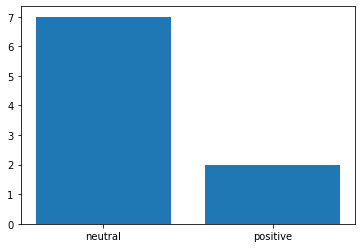

In [ ]:
plt.bar(counter.keys(), counter.values())
plt.show()